## 단변량 데이터 탐색

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('Ex_CEOSalary.csv', encoding = 'utf-8')
data.info()
# 데이터의 기본 정보를 판다스의 info함수를 통해 볼 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


### 범주형 자료 탐색

In [3]:
data['industry'].value_counts()
# value_counts() : 범주형 자료의 각 범주의 빈도를 확인할 수 있음

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [4]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()
# replace함수를 활용하여 범주형 변수의 이름을 변경할 수 있음

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

In [16]:
help(str.replace)
# help명령어를 사용해서 명령어 생각해보자

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.



<AxesSubplot:ylabel='industry'>

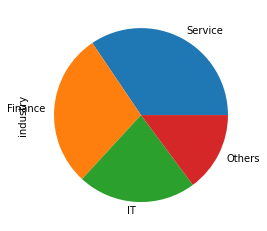

In [18]:
%matplotlib inline 
data['industry'].value_counts().plot(kind = "pie")
# .plot함수를 활용하여 시각화 가능 

<AxesSubplot:>

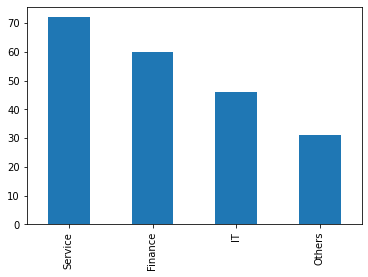

In [19]:
%matplotlib inline 
data['industry'].value_counts().plot(kind = 'bar')

### 연속형 자료 탐색

In [20]:
data.describe()
# 연속형 자료에 대해서는 describe함수를 활용하면 기술통계량 정보 확인할 수 있음

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [22]:
print(data.skew())
print(data.kurtosis())
# 데이터에 왜도와 첨도를 보여줄 수 있는 함수를 사용하여 정규분포와 유사한지 검토

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64
salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64


/var/folders/rn/572w08lj1f91tkntfly8qw7h0000gn/T/ipykernel_3107/2763250758.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.skew())
/var/folders/rn/572w08lj1f91tkntfly8qw7h0000gn/T/ipykernel_3107/2763250758.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.kurtosis())


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

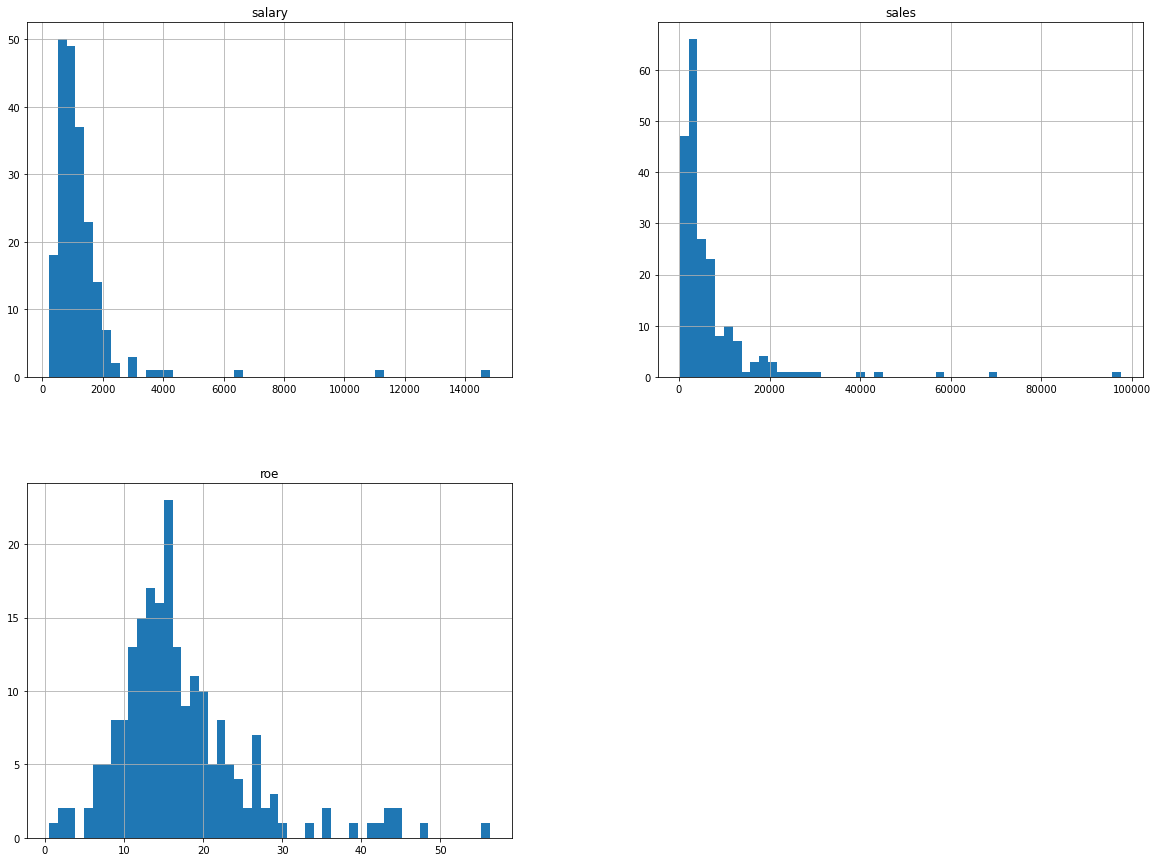

In [23]:
import matplotlib.pyplot as plt 
data.hist(bins = 50, figsize=(20,15))
# 데이터에 포함되어 있는 연속형 변수에 대해 히스토그램 그래프를 활용하여 보여줌
# hist()함수를 활용하여 데이터의 분포를 시각화 할 수 있음

<AxesSubplot:>

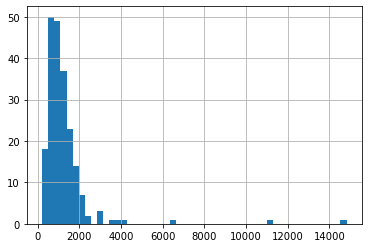

In [24]:
data['salary'].hist(bins = 50)
# 특정 변수에 대해서도 가능 

## 이변량 데이터 탐색

In [25]:
data.corr()
# corr()을 활용해서 각 변수간의 상관계수 확인가능

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [29]:
print("피어슨 상관계수 \n",data.corr(method="pearson"))
print("스피어만 상관계수 \n",data.corr(method="spearman"))
print("켄달 상관계수 \n",data.corr(method="kendall"))
# 상관계수를 추출하는 다양한 방법을 method 매개변수를 활용하여 가능

피어슨 상관계수 
           salary     sales       roe
salary  1.000000  0.119869  0.114842
sales   0.119869  1.000000 -0.055386
roe     0.114842 -0.055386  1.000000
스피어만 상관계수 
           salary     sales       roe
salary  1.000000  0.528016  0.205984
sales   0.528016  1.000000 -0.170548
roe     0.205984 -0.170548  1.000000
켄달 상관계수 
           salary     sales       roe
salary  1.000000  0.363921  0.143672
sales   0.363921  1.000000 -0.123844
roe     0.143672 -0.123844  1.000000


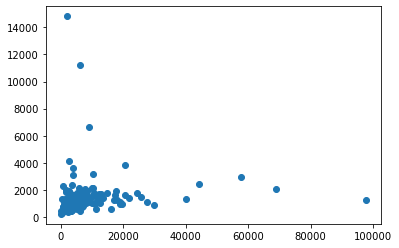

In [34]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'] )
# plt.scatter()는 산점도 보여줌
# 연속형 변수 간의 산점도를 활용하여 변수간 분포를 확인할 수 있음

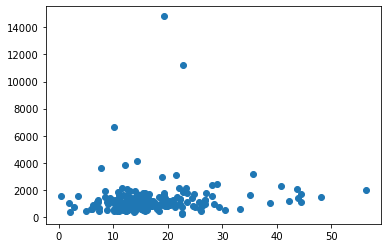

In [36]:
import matplotlib.pyplot as plt
plt.scatter(data['roe'], data['salary'])

In [39]:
# 종속 변수인 salary의 평균 및 기술 통계량 파악 
data.groupby('industry')[['salary']].describe()
# groupby(그룹별로 보고 싶은 변수)[[그룹별로 나눴을 때 보고 싶은 통계 변수]].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0